<a href="https://colab.research.google.com/github/ritaxtii/imageProcessing/blob/main/Project_ImageProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.14.0

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator


from keras.applications import *
from keras.applications.vgg19 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D,GlobalAveragePooling2D

In [6]:
model_xception=Xception(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

83683744/83683744 [==============================] - 1s 0us/step


In [7]:
f1=Flatten()(model_xception.output)
final_layer = Dense(48,activation='Softmax')(f1)
model_xception=Model(inputs=model_xception.input,outputs = final_layer)
model_xception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

In [8]:
for i,layer in enumerate(model_xception.layers):
  print(i,layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

In [ ]:
#Create DataGeneartor Object
datagen = ImageDataGenerator(rotation_range=40,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                             rescale=1/255,
                             fill_mode="nearest")

In [ ]:
train_path = '/content/drive/MyDrive/FinalProjectImage/Dataset/Train'
validate_path = '/content/drive/MyDrive/FinalProjectImage/Dataset/Validate'
test_path = '/content/drive/MyDrive/FinalProjectImage/Dataset/Test'

In [ ]:
# Create Train Image generator
train_generator = datagen.flow_from_directory(directory=train_path,
                                              target_size=(224, 224),
                                              color_mode='rgb',
                                              batch_size=33,
                                              class_mode='categorical',
                                              seed=42,
                                              shuffle=True)

Found 2194 images belonging to 48 classes.


In [ ]:
# Create Validation Image generator
val_generator = datagen.flow_from_directory(directory=validate_path,
                                            target_size=(224, 224),
                                            color_mode='rgb',
                                            batch_size=8,
                                            class_mode='categorical',
                                            seed=42,
                                            shuffle=True)

Found 532 images belonging to 48 classes.


In [ ]:
# สร้างฟังก์ชันสำหรับแสดงรูปภาพเป็นตาราง 4x4
def plot_images(generator, num_images=16):
    # สร้าง subplot 4x4
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    axes = axes.ravel()

    # ดึงรูปภาพจาก generator
    for i in range(num_images):
        # ดึงรูปภาพ
        batch = generator.next()
        img = batch[0][0]

        # แสดงรูปภาพ
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

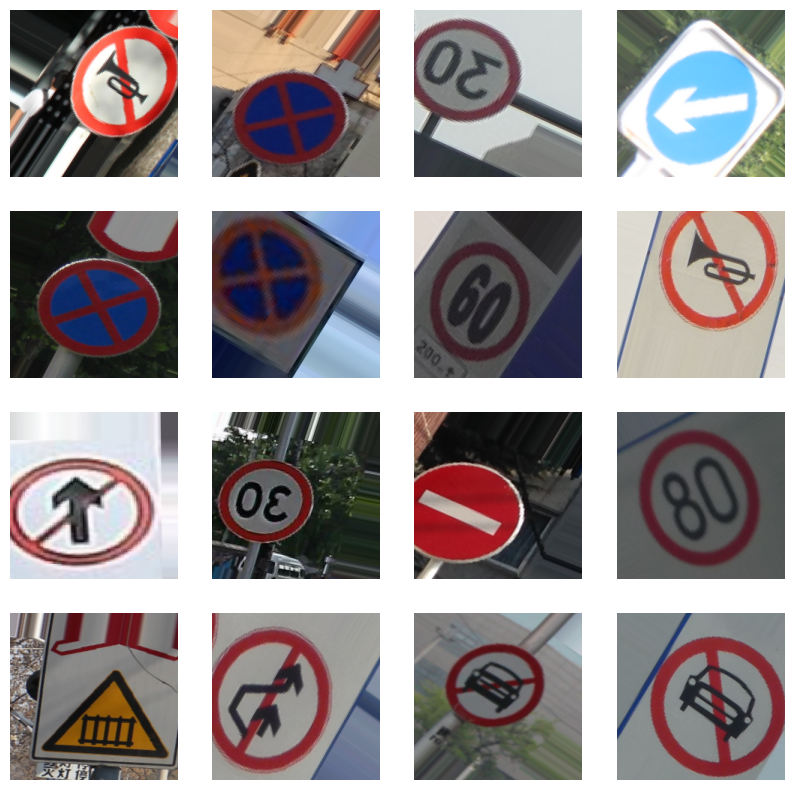

In [ ]:
# แสดงรูปภาพจาก train_generator
plot_images(train_generator, num_images=16)

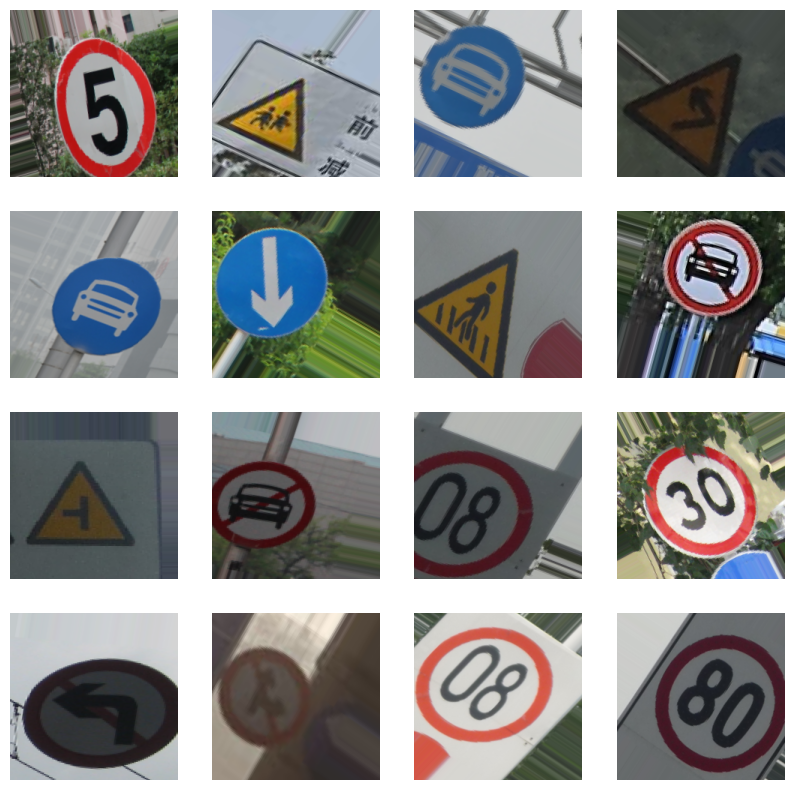

In [ ]:
# แสดงรูปภาพจาก val_generator
plot_images(val_generator, num_images=16)

In [ ]:
# Create Optimizer
opts = Adam(learning_rate = 0.0001, use_ema=True)
model_xception.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])

In [ ]:
# Define training Generator Parameter
EP = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal
if step_size_train == step_size_val:
    print("step_size_train is equal to step_size_val.")
    print(f"Number of steps per epoch: {step_size_train}")
else:
    print("step_size_train is not equal to step_size_val.")
    print(f"Number of steps per epoch (train): {step_size_train}")
    print(f"Number of steps per epoch (validation): {step_size_val}")

step_size_train is equal to step_size_val.
Number of steps per epoch: 66


In [ ]:
print(type(train_generator))
print(type(val_generator))
print(train_generator.image_shape)
print(val_generator.image_shape)

<class 'keras.src.preprocessing.image.DirectoryIterator'>
<class 'keras.src.preprocessing.image.DirectoryIterator'>
(224, 224, 3)
(224, 224, 3)


In [ ]:
history=model_xception.fit_generator(train_generator,
                                        steps_per_epoch=step_size_train,
                                        validation_data = val_generator,
                                        validation_steps = step_size_val,
                                        epochs=EP,
                                        verbose = 1)

<ipython-input-29-cd3d3802aeb6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model_xception.fit_generator(train_generator,


Epoch 1/100
66/66 [==============================] - 95s 925ms/step - loss: 3.6827 - accuracy: 0.2758 - val_loss: 3.4716 - val_accuracy: 0.3371
Epoch 2/100
66/66 [==============================] - 58s 874ms/step - loss: 3.2491 - accuracy: 0.3970 - val_loss: 2.9946 - val_accuracy: 0.4489
Epoch 3/100
66/66 [==============================] - 57s 862ms/step - loss: 2.7519 - accuracy: 0.5493 - val_loss: 2.5379 - val_accuracy: 0.5455
Epoch 4/100
66/66 [==============================] - 58s 877ms/step - loss: 2.3064 - accuracy: 0.6057 - val_loss: 2.0703 - val_accuracy: 0.6345
Epoch 5/100
66/66 [==============================] - 59s 890ms/step - loss: 1.9289 - accuracy: 0.6293 - val_loss: 1.7798 - val_accuracy: 0.6402
Epoch 6/100
66/66 [==============================] - 59s 889ms/step - loss: 1.6393 - accuracy: 0.6941 - val_loss: 1.5248 - val_accuracy: 0.7367
Epoch 7/100
66/66 [==============================] - 57s 869ms/step - loss: 1.4316 - accuracy: 0.7372 - val_loss: 1.3408 - val_accuracy:

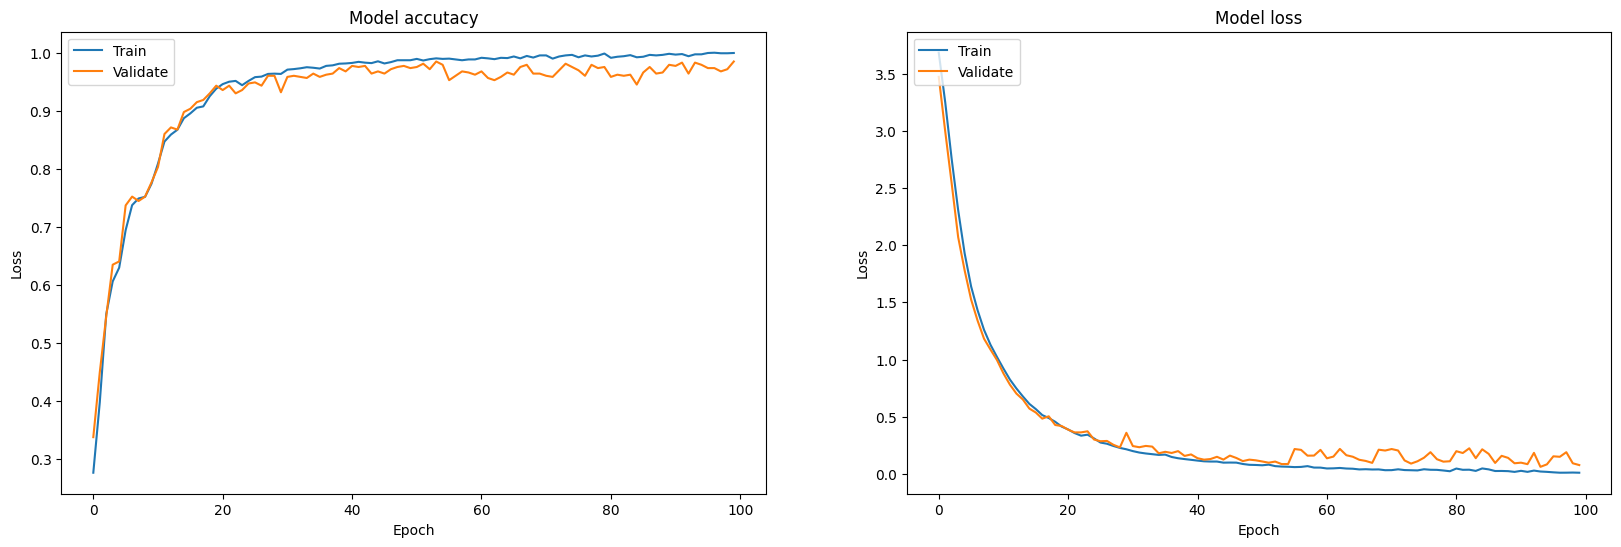

In [ ]:
# Performance Visualization
# View Accuracy (Training, Validation)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train_acc")
plt.plot(history.history["val_accuracy"], label="Validate_acc")
plt.title('Model accutacy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train_loss")
plt.plot(history.history['val_loss'], label="Validate_loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

In [ ]:
# Initial test generator
Test_generator = datagen.flow_from_directory(
    test_path,
    class_mode="categorical",
    target_size=(224, 224), color_mode="rgb",
    shuffle=False,
    batch_size=1)

Found 1168 images belonging to 48 classes.


In [ ]:
#Get class id for y_real_class
y_true = Test_generator.classes

In [ ]:
#predict images according to test_generator # number of real class
preds = model_xception.predict_generator(Test_generator)
print(preds.shape)
print(preds)

<ipython-input-41-ed0b40c52673>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model_xception.predict_generator(Test_generator)


(1168, 48)
[[9.9833006e-01 7.1421801e-04 2.4876337e-05 ... 1.0824932e-04
  3.6597943e-05 1.2747049e-05]
 [9.9786061e-01 8.7925949e-04 4.0798601e-05 ... 1.1510293e-04
  5.7981142e-05 1.8686766e-05]
 [9.9830532e-01 7.1483472e-04 2.3757935e-05 ... 1.1744348e-04
  3.4655593e-05 1.2819648e-05]
 ...
 [1.9071382e-03 3.4829015e-03 3.6239109e-03 ... 5.9449766e-04
  8.6131734e-01 2.9751265e-02]
 [1.0857936e-03 1.5530207e-03 4.9268454e-03 ... 7.4718974e-04
  9.4146568e-01 6.4251623e-03]
 [1.3082880e-03 2.8157791e-03 1.0232850e-03 ... 2.1997896e-04
  7.9944497e-03 9.3582052e-01]]


In [ ]:
y_pred = np.argmax(preds,axis=1)
print(Test_generator.classes)
print(y_pred)

[ 0  0  0 ... 46 46 47]
[ 0  0  0 ... 46 46 47]


In [ ]:
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[35  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        21
           3       1.00      0.92      0.96        65
           4       1.00      1.00      1.00        28
           5       0.71      1.00      0.83        10
           6       0.97      1.00      0.99        38
           7       1.00      1.00      1.00         6
           8       0.98      1.00      0.99        42
           9       1.00      0.97      0.99        39
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        24
          13       0.83      1.00      0.91         5
          14       1.00      1.00

In [9]:
from tensorflow.keras.models import load_model

# Save the model to an HDF5 file
model_xception.save('model_xception100epoch.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
